In [1]:
import numpy as np
from meshes.mix_mesh import truss_part, plate_part
from pybandgap.bandgap import bandgap
from pybandgap.plot_mesh import plot_IBZ, plot_structure
from pybandgap.mass_and_stiffness_matrix import mass_and_stiffness_matrix
from pybandgap.set_structure import fine_irreducible_brillouin_zone, get_midpoint_elements, Material, Props

In [2]:
Ne = 4 
a = 0.02
mesh_1, *_ = truss_part(Ne,Ne, a,a)
mesh_2, *_ = plate_part(Ne-2,Ne-2, a/2,a/2) 
meshes = [mesh_1] #, mesh_2]

In [3]:
elements_1, IBZ_condition_1 = fine_irreducible_brillouin_zone(mesh_1)
# elements_2, IBZ_condition_2 = fine_irreducible_brillouin_zone(mesh_2)

In [4]:
aluminum = Material('aluminum', young_modulus=70e9, poisson_ratio=0.33, density=2.7e3)
tungsten = Material('tungsten', young_modulus=411e9, poisson_ratio=0.28, density=19.3e3)

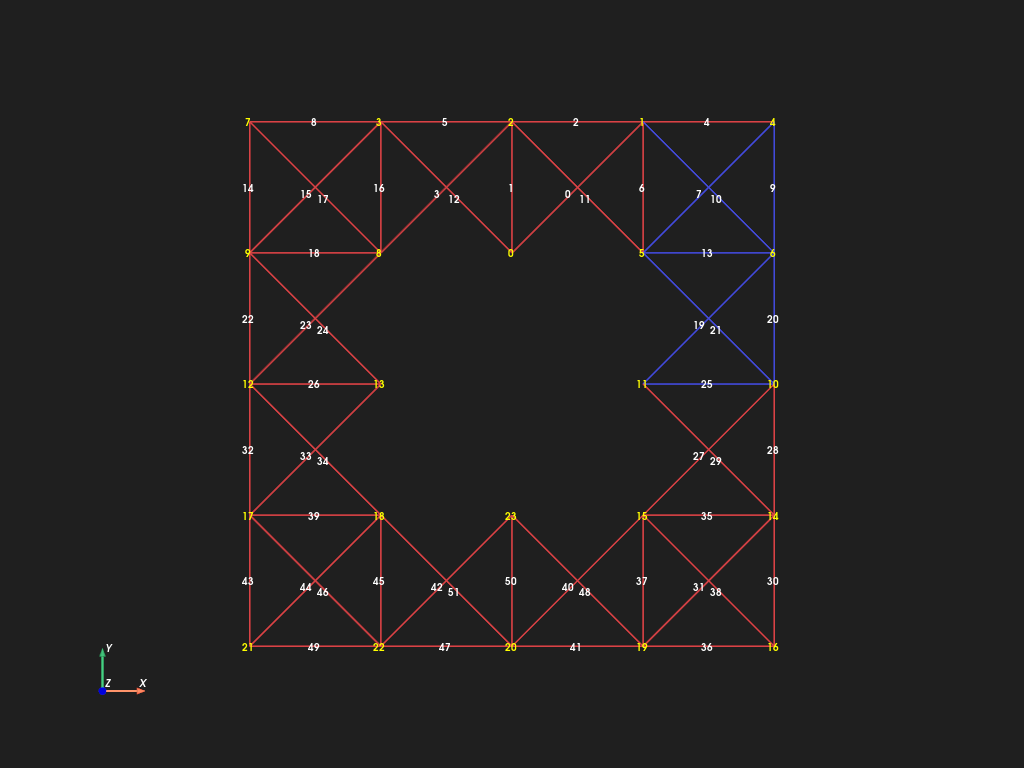

In [5]:
plot_IBZ(mesh_1, elements_1)

In [6]:
tungsten_elements = []
max_diameter_elements = [13]

material_elements = np.array([
    tungsten if i in tungsten_elements else aluminum
    for i in elements_1])

diameters_elements = np.array([
    0.008 if i in max_diameter_elements else 0.004
    for i in elements_1])

props_1 = Props(mesh_1)
props_1.set_prop('diameters', diameters_elements)
props_1.set_prop('materials', material_elements)

In [7]:
# plot_IBZ(mesh_2, elements_2)

In [8]:
# centers = get_midpoint_elements(mesh_2)

# condition_1 = centers[:,0]<= a/2/4
# condition_2 = centers[:,1]<= a/2/4

# condition = np.vstack((IBZ_condition_2, condition_1, condition_2))

# tungsten_elements = np.where(np.all(condition, axis=0))[0]

# material_elements = np.array([
#     tungsten if i in tungsten_elements else aluminum
#     for i in elements_2])

# props_2 = Props(mesh_2)
# props_2.set_prop('materials', material_elements)

In [9]:
props = [props_1]#, props_2]

In [10]:
from pybandgap.multi_mesh import mix_matrix

mass_matrix, stiffness_matrix = mass_and_stiffness_matrix(mesh_1, props_1)

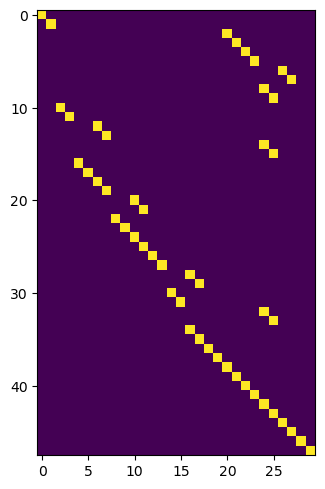

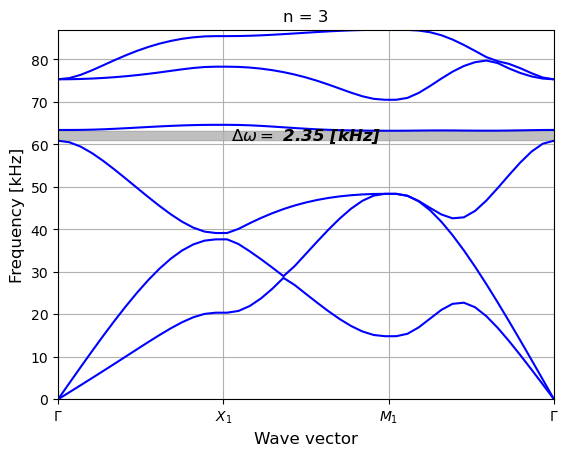

In [11]:
_ = bandgap(3, meshes, mass_matrix, stiffness_matrix, N_eig = 6, plot= True, NINT=15, tol = 1e-15, max_it = 150)